In [31]:
import requests
import pandas as pd
import json
import matplotlib.pyplot as plt

In [2]:
params={'format':'csv'}

In [3]:
response=requests.get('https://covidtracking.com/api/v1/states/daily.csv')

In [4]:
with open('covid19_historic_all_states.csv','w') as f:
    f.write(response.text)
f.close()

In [5]:
df=pd.read_csv('covid19_historic_all_states.csv')

In [6]:
df.head()

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
0,20200629,AK,904.0,107805.0,NaN,16.0,NaN,NaN,NaN,1.0,...,108709,0,0,a86a3dc4bfbba3e423434858dd4e5230e6ba9753,0,0,0,0,0,NaN
1,20200629,AL,37175.0,356118.0,NaN,715.0,2725.0,NaN,801.0,NaN,...,393293,10,22,de21472ac462718d75201c8e93e01f28b9542e9f,0,0,0,0,0,NaN
2,20200629,AR,20257.0,282279.0,NaN,300.0,1380.0,NaN,NaN,63.0,...,302536,6,7,6485f0b6af19d7d02d56b471d22c9095e38dd696,0,0,0,0,0,NaN
3,20200629,AS,0.0,696.0,NaN,NaN,NaN,NaN,NaN,NaN,...,696,0,0,eb59d7d99c77b168f8869581b58a5fec9dc91f8d,0,0,0,0,0,NaN
4,20200629,AZ,74533.0,436890.0,NaN,2721.0,4634.0,679.0,NaN,465.0,...,511423,0,17,7be4a47c695495c39660118ec049f17bb8199320,0,0,0,0,0,NaN


In [7]:
df.columns.values

array(['date', 'state', 'positive', 'negative', 'pending',
       'hospitalizedCurrently', 'hospitalizedCumulative',
       'inIcuCurrently', 'inIcuCumulative', 'onVentilatorCurrently',
       'onVentilatorCumulative', 'recovered', 'dataQualityGrade',
       'lastUpdateEt', 'dateModified', 'checkTimeEt', 'death',
       'hospitalized', 'dateChecked', 'totalTestsViral',
       'positiveTestsViral', 'negativeTestsViral', 'positiveCasesViral',
       'fips', 'positiveIncrease', 'negativeIncrease', 'total',
       'totalTestResults', 'totalTestResultsIncrease', 'posNeg',
       'deathIncrease', 'hospitalizedIncrease', 'hash', 'commercialScore',
       'negativeRegularScore', 'negativeScore', 'positiveScore', 'score',
       'grade'], dtype=object)

In [11]:
df[['date','state','positive','negative','recovered','dateModified','checkTimeEt','death','dateChecked','total','totalTestResults','totalTestResultsIncrease','posNeg','deathIncrease']].head()

,date,state,positive,negative,recovered,dateModified,checkTimeEt,death,dateChecked,total,totalTestResults,totalTestResultsIncrease,posNeg,deathIncrease
0,20200629,AK,904.0,107805.0,525.0,2020-06-29T00:00:00Z,06/28 20:00,14.0,2020-06-29T00:00:00Z,108709,108709,409,108709,0
1,20200629,AL,37175.0,356118.0,18866.0,2020-06-29T11:00:00Z,06/29 07:00,929.0,2020-06-29T11:00:00Z,393293,393293,7013,393293,10
2,20200629,AR,20257.0,282279.0,14066.0,2020-06-29T14:36:00Z,06/29 10:36,265.0,2020-06-29T14:36:00Z,302536,302536,11314,302536,6
3,20200629,AS,0.0,696.0,NaN,2020-06-27T00:00:00Z,06/26 20:00,0.0,2020-06-27T00:00:00Z,696,696,0,696,0
4,20200629,AZ,74533.0,436890.0,9179.0,2020-06-29T00:00:00Z,06/28 20:00,1588.0,2020-06-29T00:00:00Z,511423,511423,1527,511423,0


In [15]:
df_covid19=df[['date','state','positive','negative','recovered','dateModified','checkTimeEt','death','dateChecked','total','totalTestResults','totalTestResultsIncrease']].copy(deep=True)

In [16]:
df_covid19.head()

,date,state,positive,negative,recovered,dateModified,checkTimeEt,death,dateChecked,total,totalTestResults,totalTestResultsIncrease
0,20200629,AK,904.0,107805.0,525.0,2020-06-29T00:00:00Z,06/28 20:00,14.0,2020-06-29T00:00:00Z,108709,108709,409
1,20200629,AL,37175.0,356118.0,18866.0,2020-06-29T11:00:00Z,06/29 07:00,929.0,2020-06-29T11:00:00Z,393293,393293,7013
2,20200629,AR,20257.0,282279.0,14066.0,2020-06-29T14:36:00Z,06/29 10:36,265.0,2020-06-29T14:36:00Z,302536,302536,11314
3,20200629,AS,0.0,696.0,NaN,2020-06-27T00:00:00Z,06/26 20:00,0.0,2020-06-27T00:00:00Z,696,696,0
4,20200629,AZ,74533.0,436890.0,9179.0,2020-06-29T00:00:00Z,06/28 20:00,1588.0,2020-06-29T00:00:00Z,511423,511423,1527


In [19]:
df_covid19['Total - TotalTestResults']=df_covid19['total']-df_covid19['totalTestResults']

In [21]:
df_covid19['Total - TotalTestResults'].unique()

array([    0,  1744,   261,    31,   158,  1726,   295,   146,  1731,
         284,   140,  1752,    12,   142,  1675,   303,    21,   134,
        1535,   319,    35,   160,  1425,   291,    33,  1546,   298,
          15,   169,  1625,   297,     9,   153,  1630,    20,   155,
        1578,   285,    11,  1457,   259,    13,   174,  1240,   313,
         179,  1150,   257,     5,   192,  1167,   188,  1184,   302,
           2,   184,  1241,   283,     7,   167,  1242,   363,     6,
         172,   358,    28,  1134,   407,   190,  1100,   383,     4,
        1024,   373,     3,   206,  1161,   385,   183,  1265,   350,
         177,  1193,   374,     8,  1221,  1643,   412,   196,  1191,
         435,   199,  1206,  2183,   450,   209,  1160,  1661,   419,
         211,  1332,  1208,   500,    19,   960,   481,   208,  1308,
         891,   525,   235,  1158,   476,    22,   250,   955,  1370,
         444,   335,   901,    18,   218,   988,  1714,   414,    45,
         207,  1337,

In [24]:
df_covid19.sort_values(by=['state','date'],ascending=True,inplace=True)
df_covid19.head()

,date,state,positive,negative,recovered,dateModified,checkTimeEt,death,dateChecked,total,totalTestResults,totalTestResultsIncrease,Total - TotalTestResults
6390,20200306,AK,0.0,8.0,NaN,NaN,NaN,0.0,NaN,9,8,0,1
6340,20200307,AK,0.0,12.0,NaN,NaN,NaN,0.0,NaN,14,12,4,2
6290,20200308,AK,0.0,14.0,NaN,NaN,NaN,0.0,NaN,20,14,2,6
6240,20200309,AK,0.0,23.0,NaN,NaN,NaN,0.0,NaN,32,23,9,9
6190,20200310,AK,0.0,23.0,NaN,NaN,NaN,0.0,NaN,32,23,0,9


In [29]:
df_covid19.to_csv('covid19_by_state.csv',index=0)

In [30]:
df_covid19=pd.read_csv('covid19_by_state.csv')
df_covid19.head()

,date,state,positive,negative,recovered,dateModified,checkTimeEt,death,dateChecked,total,totalTestResults,totalTestResultsIncrease,Total - TotalTestResults
0,20200306,AK,0.0,8.0,NaN,NaN,NaN,0.0,NaN,9,8,0,1
1,20200307,AK,0.0,12.0,NaN,NaN,NaN,0.0,NaN,14,12,4,2
2,20200308,AK,0.0,14.0,NaN,NaN,NaN,0.0,NaN,20,14,2,6
3,20200309,AK,0.0,23.0,NaN,NaN,NaN,0.0,NaN,32,23,9,9
4,20200310,AK,0.0,23.0,NaN,NaN,NaN,0.0,NaN,32,23,0,9


In [32]:
df_covid19_FL=df_covid19[df_covid19['state']=='FL'].copy(deep=True)
df_covid19_FL.head()

,date,state,positive,negative,recovered,dateModified,checkTimeEt,death,dateChecked,total,totalTestResults,totalTestResultsIncrease,Total - TotalTestResults
1154,20200304,FL,2.0,24.0,NaN,NaN,NaN,NaN,NaN,42,26,0,16
1155,20200305,FL,9.0,31.0,NaN,NaN,NaN,NaN,NaN,109,40,14,69
1156,20200306,FL,9.0,55.0,NaN,NaN,NaN,NaN,NaN,115,64,24,51
1157,20200307,FL,14.0,100.0,NaN,NaN,NaN,NaN,NaN,202,114,50,88
1158,20200308,FL,17.0,118.0,NaN,NaN,NaN,NaN,NaN,243,135,21,108


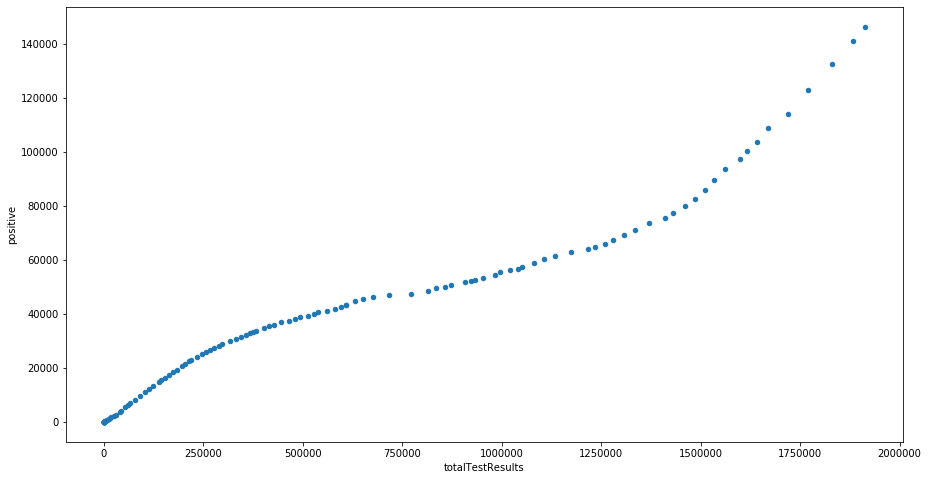

In [40]:
df_covid19_FL.plot(x='totalTestResults',y='positive',kind='scatter',figsize=(15,8))